## Ejemplo de Aplicación con la red IEEE 13 modificada ##


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import math

In [4]:
import pandapower as pp

In [5]:
import pandas as pd

In [6]:
import pyomo.environ as pe

In [7]:
import matplotlib.pyplot as plt

In [8]:
import ModelWriters as mw

In [9]:
import ModelWriters.Scenes as Scenes

In [10]:
import ModelWriters.Resources as Resources

In [11]:
import ModelWriters.Simulation as Simulation

Creating Network

In [12]:
net = pp.create_empty_network() 

Adding line parameter data:

In [13]:
line_data = {"c_nf_per_km": 0, "r_ohm_per_km": 0.40, "x_ohm_per_km": 0.30, "max_i_ka": 0.300, "type": "al", "q_mm2": 95, "alpha": 4.03e-3}
pp.create_std_type(net, line_data, "AlAc 95", element='line')

line_data = {"c_nf_per_km": 0, "r_ohm_per_km": 0.50, "x_ohm_per_km": 0.35, "max_i_ka": 0.250, "type": "al", "q_mm2": 70, "alpha": 4.03e-3}
pp.create_std_type(net, line_data, "AlAc 70", element='line')

line_data = {"c_nf_per_km": 0, "r_ohm_per_km": 0.70, "x_ohm_per_km": 0.40, "max_i_ka": 0.190, "type": "al", "q_mm2": 50, "alpha": 4.03e-3}
pp.create_std_type(net, line_data, "AlAc 50", element='line')

line_data = {"c_nf_per_km": 0, "r_ohm_per_km": 1.20, "x_ohm_per_km": 0.45, "max_i_ka": 0.130, "type": "al", "q_mm2": 25, "alpha": 4.03e-3}
pp.create_std_type(net, line_data, "AlAc 25", element='line')

In [14]:

b650 = pp.create_bus(net, name='650', vn_kv=13.2) 

pp.create_ext_grid(net, name='Ext Grid', bus=b650)

b632 = pp.create_bus(net, name='632', vn_kv=13.2) 
b633 = pp.create_bus(net, name='633', vn_kv=13.2) 
b645 = pp.create_bus(net, name='645', vn_kv=13.2) 
b646 = pp.create_bus(net, name='646', vn_kv=13.2) 

b671 = pp.create_bus(net, name='671', vn_kv=13.2)  
b675 = pp.create_bus(net, name='675', vn_kv=13.2) 

b611 = pp.create_bus(net, name='611', vn_kv=13.2) 
b684 = pp.create_bus(net, name='684', vn_kv=13.2) 
b652 = pp.create_bus(net, name='652', vn_kv=13.2) 

pp.create_line(net, name='L 650-632', from_bus=b650, to_bus=b632, length_km=2.0, std_type="AlAc 95") 
pp.create_line(net, name='L 632-671', from_bus=b632, to_bus=b671, length_km=2.0, std_type="AlAc 95") 
pp.create_line(net, name='L 671-684', from_bus=b671, to_bus=b684, length_km=1.5, std_type="AlAc 70") 

pp.create_line(net, name='L 632-645', from_bus=b632, to_bus=b645, length_km=0.5, std_type="AlAc 50") 
pp.create_line(net, name='L 645-646', from_bus=b645, to_bus=b646, length_km=0.5, std_type="AlAc 50") 
pp.create_line(net, name='L 632-633', from_bus=b632, to_bus=b633, length_km=1.0, std_type="AlAc 50") 
pp.create_line(net, name='L 671-675', from_bus=b671, to_bus=b675, length_km=1.0, std_type="AlAc 50") 
pp.create_line(net, name='L 684-611', from_bus=b684, to_bus=b611, length_km=0.5, std_type="AlAc 25") 
pp.create_line(net, name='L 684-652', from_bus=b684, to_bus=b652, length_km=1.0, std_type="AlAc 25") 

pp.create_load(net, bus=b645, p_mw=1.20, q_mvar = 0.58)
pp.create_load(net, bus=b646, p_mw=1.50, q_mvar = 0.58*1.5/1.2)
pp.create_load(net, bus=b633, p_mw=0.80, q_mvar = math.sqrt((0.80/0.85)**2-0.8**2))
pp.create_load(net, bus=b675, p_mw=0.90, q_mvar = math.sqrt((0.90/0.85)**2-0.9**2))
pp.create_load(net, bus=b611, p_mw=0.50, q_mvar = math.sqrt((0.50/0.80)**2-0.5**2))
pp.create_load(net, bus=b652, p_mw=0.60, q_mvar = math.sqrt((0.60/0.80)**2-0.6**2))


pp.create_sgen(net, name='PV 684', bus=b684, p_mw=0.00, q_mvar=0.00, max_p_mw=0.00, max_q_mvar=0.00)
pp.create_sgen(net, name='PV 633', bus=b633, p_mw=0.00, q_mvar=0.00, max_p_mw=0.00, max_q_mvar=0.00)
pp.create_sgen(net, name='PV 646', bus=b646, p_mw=0.00, q_mvar=0.00, max_p_mw=0.00, max_q_mvar=0.00)

pp.create_sgen(net, name='WT 633', bus=b633, p_mw=0.00, q_mvar=0.00, max_p_mw=0.00, max_q_mvar=0.00)

pp.create_storage(net, name='ST 684', bus=b684, p_mw=0.00, q_mvar=0.00, max_p_mw=0.00, max_q_mvar=0.00, max_e_mwh = 0.0)
pp.create_storage(net, name='ST 632', bus=b632, p_mw=0.00, q_mvar=0.00, max_p_mw=0.00, max_q_mvar=0.00, max_e_mwh = 0.0)


1

In [15]:
net.bus

,name,vn_kv,type,zone,in_service
0,650,13.2,b,None,True
1,632,13.2,b,None,True
2,633,13.2,b,None,True
3,645,13.2,b,None,True
4,646,13.2,b,None,True
5,671,13.2,b,None,True
6,675,13.2,b,None,True
7,611,13.2,b,None,True
8,684,13.2,b,None,True
9,652,13.2,b,None,True


In [16]:
net.ext_grid

,name,bus,vm_pu,va_degree,in_service
0,Ext Grid,0,1.0,0.0,True


In [17]:
net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,max_p_mw,max_q_mvar
0,PV 684,8,0.0,0.0,NaN,1.0,True,wye,True,0.0,0.0
1,PV 633,2,0.0,0.0,NaN,1.0,True,wye,True,0.0,0.0
2,PV 646,4,0.0,0.0,NaN,1.0,True,wye,True,0.0,0.0
3,WT 633,2,0.0,0.0,NaN,1.0,True,wye,True,0.0,0.0


In [18]:
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,None,3,1.2,0.580000,0.0,0.0,NaN,1.0,True,wye
1,None,4,1.5,0.725000,0.0,0.0,NaN,1.0,True,wye
2,None,2,0.8,0.495795,0.0,0.0,NaN,1.0,True,wye
3,None,6,0.9,0.557770,0.0,0.0,NaN,1.0,True,wye
4,None,7,0.5,0.375000,0.0,0.0,NaN,1.0,True,wye
5,None,9,0.6,0.450000,0.0,0.0,NaN,1.0,True,wye


In [19]:
net.storage

,name,bus,p_mw,q_mvar,sn_mva,soc_percent,min_e_mwh,max_e_mwh,scaling,in_service,type,max_p_mw,max_q_mvar
0,ST 684,8,0.0,0.0,NaN,NaN,0.0,0.0,1.0,True,None,0.0,0.0
1,ST 632,1,0.0,0.0,NaN,NaN,0.0,0.0,1.0,True,None,0.0,0.0


In [20]:
 pp.runpp(net)

In [21]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-5.787786,-3.390437
1,0.961761,-0.259960,0.000000,0.000000
2,0.957214,-0.250296,0.800000,0.495795
3,0.954492,-0.289781,1.200000,0.580000
4,0.950446,-0.306545,1.500000,0.725000
5,0.946893,-0.294868,0.000000,0.000000
6,0.941694,-0.283643,0.900000,0.557770
7,0.936815,-0.238107,0.500000,0.375000
8,0.939170,-0.280154,0.000000,0.000000
9,0.933497,-0.178884,0.600000,0.450000


In [22]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,5.787786,3.390437,-5.581204,-3.235501,0.206582,0.154936,0.293387,0.293387,0.293387,1.000000,0.000000,0.961761,-0.259960,97.795574
1,2.051226,1.417575,-2.020366,-1.394430,0.030860,0.023145,0.113394,0.113394,0.113394,0.961761,-0.259960,0.946893,-0.294868,37.798022
2,1.115287,0.833758,-1.105978,-0.827242,0.009309,0.006516,0.064321,0.064321,0.064321,0.946893,-0.294868,0.939170,-0.280154,25.728549
3,2.726094,1.319911,-2.706172,-1.308527,0.019922,0.011384,0.137744,0.137744,0.137744,0.961761,-0.259960,0.954492,-0.289781,72.496695
4,1.506172,0.728527,-1.500000,-0.725000,0.006172,0.003527,0.076669,0.076669,0.076669,0.954492,-0.289781,0.950446,-0.306545,40.351960
5,0.803884,0.498015,-0.800000,-0.495795,0.003884,0.002219,0.043006,0.043006,0.043006,0.961761,-0.259960,0.957214,-0.250296,22.634647
6,0.905079,0.560672,-0.900000,-0.557770,0.005079,0.002902,0.049179,0.049179,0.049179,0.946893,-0.294868,0.941694,-0.283643,25.883659
7,0.501533,0.375575,-0.500000,-0.375000,0.001533,0.000575,0.029180,0.029180,0.029180,0.939170,-0.280154,0.936815,-0.238107,22.446475
8,0.604446,0.451667,-0.600000,-0.450000,0.004446,0.001667,0.035141,0.035141,0.035141,0.939170,-0.280154,0.933497,-0.178884,27.031511


In [23]:
print(net)

This pandapower network includes the following parameter tables:
   - bus (10 elements)
   - load (6 elements)
   - sgen (4 elements)
   - storage (2 elements)
   - ext_grid (1 element)
   - line (9 elements)
 and the following results tables:
   - res_bus (10 elements)
   - res_line (9 elements)
   - res_ext_grid (1 element)
   - res_load (6 elements)
   - res_sgen (4 elements)
   - res_storage (2 elements)


## Construcción de Escenarios

In [24]:
Mean_Monthly_Solar_Irradiance = [7.5e3, 7.2e3, 6.5e3, 5.5e3, 4.5e3, 3.5e3, 2.5e3, 3.5e3, 4.5e3, 6.0e3, 7.0e3, 8.5e3]

In [25]:
sun_synth = Simulation.MonthlySolarIrradianceSimulator(latitude = -40.5490, longitude = -62.2438, 
                                                       monthly_average_irradiation = Mean_Monthly_Solar_Irradiance)

In [26]:
wind_synth = Simulation.Weibull(c = 7.5 / 0.886, k = 2)

In [27]:
wind_synth = Simulation.CorrelatedWeibull(c = 7.5 / 0.886, k = 2)

In [28]:
#s = Scenes.SceneBuilder(years = 4, subperiods = 1, days_in_subperiods = 1, dt=24, growth_rate = 0.025, discount_rate = 0.05)
#s = Scenes.SceneBuilder(years = 4, subperiods = 4, days_in_subperiods = 1, dt=1, growth_rate = 0.025, discount_rate = 0.05)
#s = Scenes.SceneBuilder(years = 20, subperiods = 4, days_in_subperiods = 5, dt=2, growth_rate = 0.025, discount_rate = 0.03)
#s = Scenes.SceneBuilder(years = 20, subperiods = 12, days_in_subperiods = 7, growth_rate = 0.025, discount_rate = 0.03)
#s = Scenes.SceneBuilder(years = 20, subperiods = 1, days_in_subperiods = 365, dt = 1, growth_rate = 0.025, discount_rate = 0.03)
s = Scenes.SceneBuilder(years = 20, subperiods = 6, days_in_subperiods = 1, dt = 3, growth_rate = 0.025, discount_rate = 0.10)
s.additional_columns['solar_irradiance'] = sun_synth
s.additional_columns['wind_speed'] = wind_synth
scenes = s.build_scenes()
scenes

,year,day,dd,hour,dt,growth,discount,solar_irradiance,wind_speed
0,0.0,0.0,60.833333,0.0,3.0,1.00000,1.000000,0.000000e+00,1.336742
1,0.0,0.0,60.833333,3.0,3.0,1.00000,1.000000,0.000000e+00,2.972602
2,0.0,0.0,60.833333,6.0,3.0,1.00000,1.000000,2.304652e+02,3.130840
3,0.0,0.0,60.833333,9.0,3.0,1.00000,1.000000,7.628047e+02,4.887169
4,0.0,0.0,60.833333,12.0,3.0,1.00000,1.000000,1.038001e+03,5.596868
...,...,...,...,...,...,...,...,...,...
955,19.0,300.0,60.833333,9.0,3.0,1.59865,0.163508,2.333897e+02,7.852390
956,19.0,300.0,60.833333,12.0,3.0,1.59865,0.163508,3.126873e+02,6.608711
957,19.0,300.0,60.833333,15.0,3.0,1.59865,0.163508,2.343940e+02,6.327598
958,19.0,300.0,60.833333,18.0,3.0,1.59865,0.163508,4.601810e-14,4.015789


An scene set with variying discount rate

In [29]:
scenery_collection = {}
for i in range(1, 11):
    s = Scenes.SceneBuilder(years = 20, subperiods = 6, days_in_subperiods = 2, dt = 1, growth_rate = 0.025, discount_rate = i/100)
    s.additional_columns['solar_irradiance'] = sun_synth
    s.additional_columns['wind_speed'] = wind_synth
    scenes = s.build_scenes()
    scenery_collection[i] = scenes

In [30]:
scenery_collection[1]

,year,day,dd,hour,dt,growth,discount,solar_irradiance,wind_speed
0,0.0,0.0,30.416667,0.0,1.0,1.00000,1.00000,0.0,8.099168
1,0.0,0.0,30.416667,1.0,1.0,1.00000,1.00000,0.0,8.265120
2,0.0,0.0,30.416667,2.0,1.0,1.00000,1.00000,0.0,7.522054
3,0.0,0.0,30.416667,3.0,1.0,1.00000,1.00000,0.0,6.818896
4,0.0,0.0,30.416667,4.0,1.0,1.00000,1.00000,0.0,8.930116
...,...,...,...,...,...,...,...,...,...
5755,19.0,301.0,30.416667,19.0,1.0,1.59865,0.82774,0.0,7.430331
5756,19.0,301.0,30.416667,20.0,1.0,1.59865,0.82774,0.0,6.737971
5757,19.0,301.0,30.416667,21.0,1.0,1.59865,0.82774,0.0,6.524022
5758,19.0,301.0,30.416667,22.0,1.0,1.59865,0.82774,0.0,6.768391


## External Data Loading

### Residential User, summer and winter cases

In [31]:
residential_user_summer = pd.read_csv('.\\Data\\UserResSum.csv', header = None, squeeze = True) 

In [32]:
residential_user_winter = pd.read_csv('.\\Data\\UserResWin.csv', header = None, squeeze = True) 

Data is loaded to a data syntethizer:

In [33]:
Residential_Synth = Simulation.DailyInterpolator( post_random_up=0.15, post_random_down=0.15)

#data is hourly, 24 hs
hours = [h for h in range(24)]

Residential_Synth.add_day(355, hours, residential_user_summer)   
Residential_Synth.add_day(172, hours, residential_user_winter)  


### Commercial User, summer and winter cases

In [34]:
commercial_user_summer = pd.read_csv('.\\Data\\UserComSum.csv', header = None, squeeze = True) 

In [35]:
commercial_user_winter = pd.read_csv('.\\Data\\UserComWin.csv', header = None, squeeze = True) 

Data is loaded to a data syntethizer:

In [36]:
Commercial_Synth = Simulation.DailyInterpolator( post_random_up=0.15, post_random_down=0.15)
Commercial_Synth.add_day(355, hours, commercial_user_summer)   #north hemisfere convention, summer is June 21st
Commercial_Synth.add_day(172, hours, commercial_user_winter)   #north hemisfere convention, summer is June 21st


### Industrial User, summer and winter cases

In [37]:
industrial_user_summer = pd.read_csv('.\\Data\\UserIndSum.csv', header = None, squeeze = True) 

In [38]:
industrial_user_winter = pd.read_csv('.\\Data\\UserIndWin.csv', header = None, squeeze = True) 

Data is loaded to a data syntethizer:

In [39]:
Industrial_Synth = Simulation.DailyInterpolator( post_random_up=0.05, post_random_down=0.05)
Industrial_Synth.add_day(355, hours, industrial_user_summer)   #north hemisfere convention, summer is June 21st
Industrial_Synth.add_day(172, hours, industrial_user_winter)   #north hemisfere convention, summer is June 21st


Example using Residential User:

In [40]:
res = [Residential_Synth.simulate(scenes.iloc[i]) for i in range(len(scenes))]

No handles with labels found to put in legend.


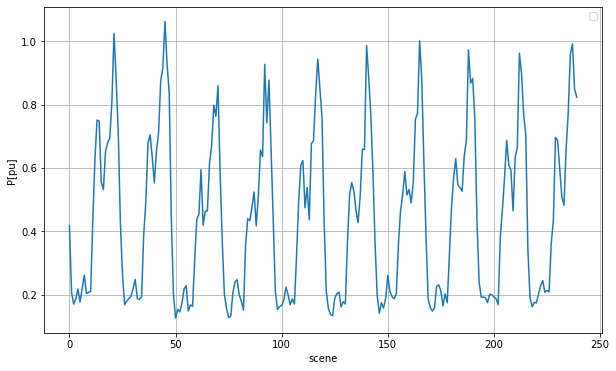

In [41]:
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
    
ax.plot(res[240:480])
    
ax.set_xlabel('scene')
ax.set_ylabel('P[pu]')

ax.legend()

ax.grid(True)


plt.show()

In [42]:
def plot_results(results, a = 0, b = 240, items = None, elements = False, lines = False, l_ep = False):
    # Set the plot curve with markers and a title
    if not (elements or lines or l_ep or items):
        raise Exception("Nothing to plot")
    
    fig, ax = plt.subplots(1, 1)

    fig.set_size_inches(10,6)
    
    for col in results:
        p = False
        if items and col in items:
            p = True
        elif col[0:2] == 'L ':
            if col[-4:] == 'ep_h':
                if l_ep:
                    p = True
            elif lines:
                p = True
        elif elements:
            p = True

        if p:
            ax.plot(results[col][a:b], label = col)
    
    ax.set_xlabel('time')
    ax.set_ylabel('P[mw]')

    ax.legend()

    ax.grid(True)


    plt.show()
    

# LCOE without DG.

## Optimization models

In [43]:
mw.network_precondition(net)

In [44]:
net.ext_grid['model'][0] = Resources.ExtGrid('SET', pr_mw = 10.0, peak_value=150, valley_value=80, rest_value=100)

In [45]:
net.load['model'][0] = Resources.Load('645', pr_mw = 1.20, pa_pu = Industrial_Synth)
net.load['model'][1] = Resources.Load('646', pr_mw = 1.50, pa_pu = Industrial_Synth)
net.load['model'][2] = Resources.Load('633', pr_mw = 0.80, pa_pu = Commercial_Synth)
net.load['model'][3] = Resources.Load('675', pr_mw = 0.90, pa_pu = Commercial_Synth)
net.load['model'][4] = Resources.Load('611', pr_mw = 0.50, pa_pu = Residential_Synth)
net.load['model'][5] = Resources.Load('652', pr_mw = 0.60, pa_pu = Residential_Synth)

In [46]:
net.sgen['model'][0] = Resources.PVGenerator('PV 684', ic_0_mu = 10.0e3, ic_1_mu = 1.35e6, oc_0_mu = 15.0e3/8760, oc_1_mu = 0.0)
net.sgen['model'][1] = Resources.PVGenerator('PV 633', ic_0_mu = 10.0e3, ic_1_mu = 1.35e6, oc_0_mu = 15.0e3/8760, oc_1_mu = 0.0)
net.sgen['model'][2] = Resources.PVGenerator('PV 646', ic_0_mu = 10.0e3, ic_1_mu = 1.35e6, oc_0_mu = 15.0e3/8760, oc_1_mu = 0.0)

net.sgen['model'][3] = Resources.WTGeneratorDiscrete('WT 633', ic_0_mu = 10.0e3, unit_size_mw = 0.800, unit_cost_mu = 1200e3, oc_0_mu = 0.00,
                                                     oc_1_mu = 15.0, cut_in = 3.0, v_rated = 12.0, cut_out = 34.0)   #Enercom E-53 800 kW
#net.sgen['model'][2] = Resources.PVGeneratorDiscrete('PV2', unit_size_mw = 0.05, unit_cost_mu = 51e3, oc_0_mu = 0.03, oc_1_mu = 0.0)

In [47]:
#net.storage['model'][0] = Resources.Storage('ST 684', ic_1_mu = 554e3, ic_1_mu_cap = 1000e3, oc_1_mu = 2.28*4, eta_bb = 0.8, sigma = 2.1e-3)
#net.storage['model'][1] = Resources.Storage('ST 632', ic_1_mu = 554e3, ic_1_mu_cap = 1000e3, oc_1_mu = 2.28*4, eta_bb = 0.8, sigma = 2.1e-3)
#net.storage['model'][0] = Resources.Storage('ST 684', ic_1_mu = 300e3, ic_1_mu_cap = 500e3, oc_1_mu = 2.28*4/4, eta_bb = 0.8, sigma = 2.1e-3)
#net.storage['model'][1] = Resources.Storage('ST 632', ic_1_mu = 300e3, ic_1_mu_cap = 500e3, oc_1_mu = 2.28*4/4, eta_bb = 0.8, sigma = 2.1e-3)

net.storage['model'][0] = Resources.Storage('ST 684', ic_0_mu = 10e3, ic_1_mu = 100.0e3, ic_1_mu_cap = 1000e3, oc_0_mu = 15e3/8760, oc_1_mu = 0.0, eta_bb = 0.9, sigma = 2.1e-3)
net.storage['model'][1] = Resources.Storage('ST 632', ic_0_mu = 10e3, ic_1_mu = 100.0e3, ic_1_mu_cap = 1000e3, oc_0_mu = 15e3/8760, oc_1_mu = 0.0, eta_bb = 0.9, sigma = 2.1e-3)


In [48]:
net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,max_p_mw,max_q_mvar,model
0,PV 684,8,0.0,0.0,NaN,1.0,True,wye,True,0.0,0.0,Resource: PV 684
1,PV 633,2,0.0,0.0,NaN,1.0,True,wye,True,0.0,0.0,Resource: PV 633
2,PV 646,4,0.0,0.0,NaN,1.0,True,wye,True,0.0,0.0,Resource: PV 646
3,WT 633,2,0.0,0.0,NaN,1.0,True,wye,True,0.0,0.0,Resource: WT 633


In [49]:
net.storage

,name,bus,p_mw,q_mvar,sn_mva,soc_percent,min_e_mwh,max_e_mwh,scaling,in_service,type,max_p_mw,max_q_mvar,model
0,ST 684,8,0.0,0.0,NaN,NaN,0.0,0.0,1.0,True,None,0.0,0.0,Resource: ST 684
1,ST 632,1,0.0,0.0,NaN,NaN,0.0,0.0,1.0,True,None,0.0,0.0,Resource: ST 632


# LCOE without DERs

## Model Creation

In [50]:
#model_writer = mw.MultiBusbarModelWriter(net, scenes, overload_cost = 2.0)
#model_writer = mw.MultiBusbarModelWriter(net, scenes, overload_cost = None)
#model_writer = mw.MultiBusbarModelWriter(net, scenes, overload_hours = 4000)
def eval_scene(idx, scenes):
    res = {}
    der_elements = [net.sgen['model'][0], net.sgen['model'][1],  net.sgen['model'][2], net.sgen['model'][3], 
                net.storage['model'][0], net.storage['model'][1]]
    ext_elements = [net.ext_grid['model'][0]]
    
    print("Evaluando: {0}".format(idx))
    print('Creando Modelo')
    model_writer = mw.MultiBusbarModelWriter(net, scenes, overload_cost = None, overload_hours = None, max_i_pu = 1.2)
    model = model_writer.create_model()
    #additional constraints
    ##model_writer.additional_constraint("no_PV", net.sgen['model'][0].create + net.sgen['model'][1].create + net.sgen['model'][2].create == 0)
    ##model_writer.additional_constraint("no_ST", net.storage['model'][0].create + net.storage['model'][1].create  == 0)
    ##model_writer.additional_constraint("no_WT", net.sgen['model'][3].create == 0)
    #resolution
    print('Resolviendo')
    opt = pe.SolverFactory('cplex')
    result_obj= opt.solve(model, tee=True)
    print('Guardando Resultados')
    model_writer.backconfigure_network()
    
    res['sgen'] = net.sgen.copy(deep = True)
    res['storage'] = net.storage.copy(deep = True)
    
    ic = pe.value(model_writer.initial_cost_expression())
    oc_e = model_writer.opetaring_costs_value(ext_elements)
    oc_der = model_writer.opetaring_costs_value(der_elements)
    lcoe = model_writer.lcoe()
    tde = model_writer.total_discounted_energy()
    
    eco_res = [lcoe, tde, ic/tde, oc_e/tde, oc_der/tde]
    
    res['eco'] = eco_res
    
    print(res)
    
    return res

In [51]:
res_sensibilidad = {}
for i in scenery_collection:
    scenes = scenery_collection[i]
    res = eval_scene(i, scenes)
    res_sensibilidad[i] = res

Evaluando: 1
Creando Modelo
Resolviendo

Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 20.1.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2020.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\jmsar\AppData\Local\Temp\tmpie_mn774.cplex.log' open.
CPLEX> Problem 'C:\Users\jmsar\AppData\Local\Temp\tmpytxp0est.pyomo.lp' read.
Read time = 0.39 sec. (13.00 ticks)
CPLEX> Problem name         : C:\Users\jmsar\AppData\Local\Temp\tmpytxp0est.pyomo.lp
Objective sense      : Minimize
Variables            :  103696  [Nneg: 34569,  Box: 57600,  Free: 11520,
                                 Binary: 6,  General Integer: 1]
Objective nonzeros   :   11534
Linear constraints   :  138250  [Less: 69128,  Equal: 69122]
  Nonzeros           :  307255
  RHS

In [52]:
res_sensibilidad

{1: {'sgen':      name  bus  p_mw  q_mvar  sn_mva  scaling  in_service type  \
  0  PV 684    8   0.0     0.0     NaN      1.0       False  wye   
  1  PV 633    2   0.0     0.0     NaN      1.0        True  wye   
  2  PV 646    4   0.0     0.0     NaN      1.0       False  wye   
  3  WT 633    2   0.0     0.0     NaN      1.0        True  wye   
  
     current_source  max_p_mw  max_q_mvar             model  
  0            True   0.00000    0.000000  Resource: PV 684  
  1            True   4.09853    2.049265  Resource: PV 633  
  2            True   0.00000    0.000000  Resource: PV 646  
  3            True   8.00000    4.000000  Resource: WT 633  ,
  'storage':      name  bus  p_mw  q_mvar  sn_mva  soc_percent  min_e_mwh  max_e_mwh  \
  0  ST 684    8   0.0     0.0     NaN          NaN        0.0        0.0   
  1  ST 632    1   0.0     0.0     NaN          NaN        0.0        0.0   
  
     scaling  in_service  type  max_p_mw  max_q_mvar             model  
  0      1.0     

In [2]:
delta = 0.5*(103.12 - 78.95)
mid = (103.12 + 78.95)/2

In [5]:
(delta/mid)/5*100

2.6550227934310984

# Results

In [53]:
import numpy as np

In [54]:
import matplotlib.colors as mcolors

In [66]:
columns = ["{0}%".format(k) for k in res_sensibilidad.keys()]
columns

['1%', '2%', '3%', '4%', '5%', '6%', '7%', '8%', '9%', '10%']

In [56]:
rows = ['Initial Cost', 'External Energy', 'Operating Cost']

In [59]:
data = [res_sensibilidad[k]['eco'][2:] for k in res_sensibilidad.keys()] 

In [60]:
data

[[31.76201448725737, 38.8051539032507, 8.390277677514337],
 [32.55379997633721, 42.519743122289775, 7.858011526415484],
 [32.45081669779873, 43.93167909324084, 7.605321099450141],
 [32.43227845833251, 48.27151133754209, 7.10338002295912],
 [34.32419759785539, 48.01824907150696, 7.108324708613239],
 [35.39118715806205, 50.44643369236132, 7.025224727476754],
 [35.20779693474495, 55.49382622849638, 6.295795095307251],
 [36.960618648588586, 53.64174269921114, 6.504781701087856],
 [34.50417673447817, 57.49375019851367, 5.955412595286697],
 [33.4043326160738, 64.6670384284072, 5.049725031128478]]

In [ ]:
data[0]

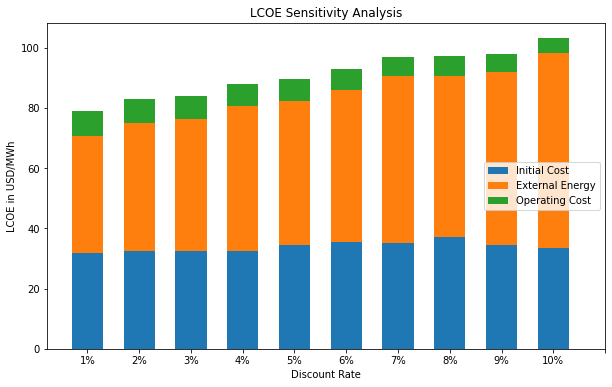

In [69]:
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
    
values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = [color for name, color in mcolors.TABLEAU_COLORS.items()]
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.6

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

for col in range(len(columns)):
    y_offset = 0
    for d in range(len(data[col])):
        dat = data[col][d]
        plt.bar(0.5 + 1*col, dat, bar_width, bottom=y_offset, color =colors[d])
        y_offset += dat


# Adjust layout to make room for the table:
#plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("LCOE in USD/MWh")
plt.xlabel("Discount Rate")
#plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([0.5 + i for i in range(11)], columns + [''])
plt.title('LCOE Sensitivity Analysis')

ax.legend(rows, loc = 'center right')

plt.show()